# Orthogonality

Mathematically, we know that a basis in $m$-dimensional space is any collection of $m$ independent vectors. In that sense, all bases are alike. But some bases behave a little more simply than others. 

For example, here are two nonsingular matrices. Each one has columns that form a basis of $\mathbb{R}^2$.

In [1]:
A = [ 1 0; 0 1 ]


A =

     1     0
     0     1



In [2]:
B = [1 1;0 1e-10 ]


B =

    1.0000    1.0000
         0    0.0000



If we pick a vector on the unit circle and express it in the $A$-basis, nothing happens, as this is the standard basis. 

In [3]:
format long, theta = pi/5; x = [cos(theta);sin(theta)]


x =

   0.809016994374947
   0.587785252292473



In [4]:
inv(A)*x


ans =

   0.809016994374947
   0.587785252292473



However, this same vector requires huge coefficients when expressed in the $B$-basis. 

In [5]:
inv(B)*x


ans =

   1.0e+09 *

  -5.877852522115714
   5.877852522924731



This should give us pause. If we turn around and multiply by $B$ in order to get back to the original coordinates, we will be relying on subtraction of two large numbers to give a result close to 1. This is the classic recipe for numerical cancellation errors in finite precision arithmetic.

In [6]:
B*ans


ans =

   0.809017181396484
   0.587785252292473



In [7]:
ans-x


ans =

   1.0e-06 *

   0.187021536923737
                   0



In an everyday sense this difference is "small", but it is about a billion times larger than the native precision of 16 digits. We usually want to avoid this situation in computation.

## Lengths and angles

Using the Pythagorean theorem, we can compute the geometric "length" of a vector using the dot product of a vector with itself. (Note: In programming the "length" of a vector usually means the number of entries in the vector. We usually use *norm* for the geometric concept.)

In [8]:
x = [1.;8;-2;1];
x_dot_x = dot(x,x)


x_dot_x =

    70



In [9]:
norm(x)^2


ans =

    70



Dot products also allow us to define the angle between two vectors, generalizing the idea from vector calculus.

In [10]:
y = [-1.;0;4;4];
theta = acos( dot(x,y)/(norm(x)*norm(y)) )


theta =

   1.675016190551446



## Orthogonal vectors and matrices

A pair of vectors is *orthogonal* if the angle between them is 90 degrees; i.e., their inner product is zero. An orthogonal pair $x,y$ has an important property: $\|x+y\|^2=\|x\|^2+\|y\|^2$.

In [11]:
x = [1.;-1;2;2];  y = [3.;3;-1;1];
dot(x,y)


ans =

     0



In [12]:
norm(x+y)^2 - (norm(x)^2 + norm(y)^2)


ans =

    -7.105427357601002e-15



We say the vectors are *orthonormal* if they are orthogonal and both have 2-norm equal to 1. 

If a collection of vectors are all pairwise orthogonal, then the matrix of all their inner products is diagonal. Recall that the product $AB$ is the collection of all inner products between rows of $A$ and columns of $B$. So we make these vectors columns of a matrix $Q$ and get

In [13]:
format short e
Q = [
    [1;0.843793815631381;0.385082841103097;1.153941363055059;0.041831019534880],...
    [1.279954581538459;1;-3.713389640445241;-0.560099231434212;-1.134662608390795],...
    [0.829958945764782;1;-1.755401660923549;-1.159560882513616;8.134813986513553]
    ]


Q =

   1.0000e+00   1.2800e+00   8.2996e-01
   8.4379e-01   1.0000e+00   1.0000e+00
   3.8508e-01  -3.7134e+00  -1.7554e+00
   1.1539e+00  -5.6010e-01  -1.1596e+00
   4.1831e-02  -1.1347e+00   8.1348e+00



In [14]:
Q'*Q


ans =

   3.1936e+00   5.9305e-17   1.6076e-15
   5.9305e-17   1.8029e+01   2.8245e-15
   1.6076e-15   2.8245e-15   7.2290e+01



If moreover the columns are not just orthogonal but orthonormal, then $Q^TQ=I$.

We now bring things back to bases. An "ideal basis" is one that is orthonormal. If we collect such a basis into the matrix $Q$, then $Q$ is called an *orthogonal matrix*. In this case, $Q$ is square and $Q^TQ=I$, i.e., $Q^{-1}=Q^T$. 

## Geometry in $\mathbb{R}^2$ and orthogonal matrices

In two dimensions, the orthogonal matrices represent rotations,

In [15]:
rot = @(theta) [ cos(theta) -sin(theta); sin(theta) cos(theta) ];
R = rot(2*pi/5)


R =

   3.0902e-01  -9.5106e-01
   9.5106e-01   3.0902e-01



and reflections,

In [16]:
refl = @(theta) eye(2) - 2*[cos(theta);sin(theta)]*[cos(theta) sin(theta)];
F = refl(2*pi/5)


F =

   8.0902e-01  -5.8779e-01
  -5.8779e-01  -8.0902e-01



In [17]:
R'*R-eye(2)


ans =

  -1.1102e-16   9.2144e-18
   9.2144e-18  -1.1102e-16



In [18]:
F'*F-eye(2)


ans =

            0  -1.4317e-16
  -1.4317e-16  -3.3307e-16



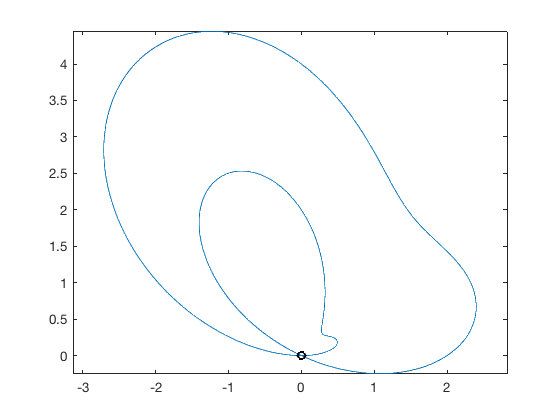

In [19]:
theta = linspace(0,2*pi,800)';
r = cos(3*theta)+3*sin(theta)+1;
x = r.*cos(theta); y = r.*sin(theta);
plot(x,y,"-");
hold on, plot(0,0,"ko");
axis equal

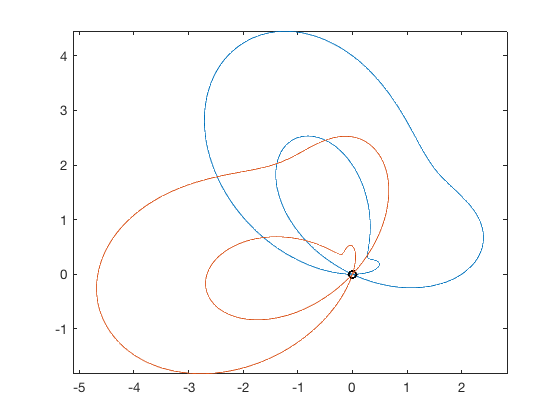

In [20]:
u=[x';y']; Ru=R*u; 

plot(x,y,"-");
hold on, plot(0,0,"ko");
plot(Ru(1,:),Ru(2,:),"-")
axis equal

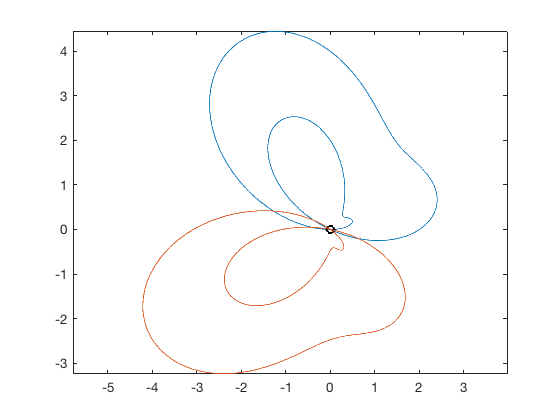

In [21]:
u=[x';y']; Fu=F*u; 

plot(x,y,"-");
hold on, plot(0,0,"ko");
plot(Fu(1,:),Fu(2,:),"-")
axis equal

## Complex values

For complex matrices we usually deal with the conjugate transpose, or *hermitian*, of the matrix, and use a \* superscript for it. We will be working with complex matrices a fair amount; often it's easiest to make statements for them and then specialize to real matrices by replacing \* with transpose. 

Note that the dot product includes complex conjugation on the first argument.

In [22]:
dot([1i],[1])


ans =

   0.0000e+00 - 1.0000e+00i



In [23]:
dot([1],[1i])


ans =

   0.0000e+00 + 1.0000e+00i



A complex square matrix $U$ for which $U^{-1}=U^*$ (i.e., columns are an orthonormal basis in $\mathbb{C}^m$) is called *unitary*.